In [1]:
# REFERENCE:

# Aman Kharwal
# Contact Tracing with Machine Learning

# https://thecleverprogrammer.com/2020/08/20/contact-tracing-with-machine-learning/
# https://amankharwal.medium.com/5-covid-19-projects-with-python-and-machine-learning-63d51cde96e2

In [2]:
# Contact tracing - Identifying other persons who may have been infected by a COVID19.
# Use location data (lat, long)
# DBSCAN algorithm or Density-based spatial clustering of applications with noise
# Make an API :)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json('data.json')
df.head()

,id,latitude,longitude,timestamp
0,David,13.148953,77.593651,2020-07-04 15:35:30
1,David,13.222397,77.652828,2020-07-04 16:35:30
2,Frank,13.236507,77.693792,2020-07-04 14:35:30
3,Frankie,13.148953,77.593650,2020-07-04 14:35:30
4,Carol,13.163716,77.562842,2020-07-04 21:35:30


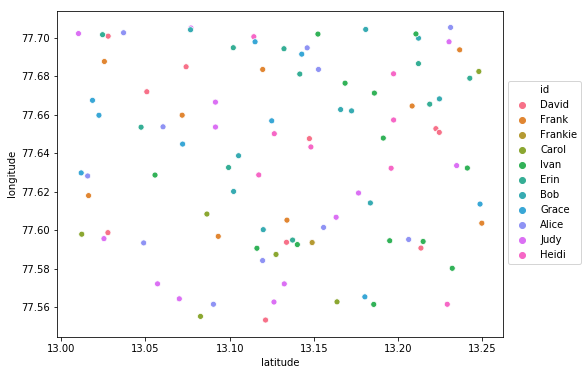

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

In [5]:
def get_infected_names(input_name):

    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    
    return infected_names


In [6]:
# epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
# model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
# labels = model.labels_
# fig = plt.figure(figsize=(12,10))
# sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
# plt.legend(bbox_to_anchor = [1, 1])
# plt.show()

# epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
# model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
# df['cluster'] = model.labels_.tolist()
# df.head()

In [7]:
# Enter the patient name and check for other persons possible infected
print(get_infected_names('David'))

['Frankie']
